In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("50_Startups_dataset.csv")
data.head()

,Unnamed: 0,R&D Spend,Administration,Marketing Spend,State,Profit
0,0,165349.30,136897.90,471784.20,New York,192261.93
1,1,162597.80,151377.69,443898.63,California,191792.16
2,2,153441.61,101145.65,407934.64,Florida,191050.49
3,3,144372.51,118671.95,383199.72,New York,182902.09
4,4,142107.44,91391.87,366168.52,Florida,166188.04


In [5]:
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
state_encoded=le.fit_transform(data['State'])
data['State'] = state_encoded
data.head()

,Unnamed: 0,R&D Spend,Administration,Marketing Spend,State,Profit
0,0,165349.30,136897.90,471784.20,2,192261.93
1,1,162597.80,151377.69,443898.63,0,191792.16
2,2,153441.61,101145.65,407934.64,1,191050.49
3,3,144372.51,118671.95,383199.72,2,182902.09
4,4,142107.44,91391.87,366168.52,1,166188.04


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       50 non-null     int64  
 1   R&D Spend        50 non-null     float64
 2   Administration   50 non-null     float64
 3   Marketing Spend  50 non-null     float64
 4   State            50 non-null     int32  
 5   Profit           50 non-null     float64
dtypes: float64(4), int32(1), int64(1)
memory usage: 2.3 KB


In [7]:
data.describe()

,Unnamed: 0,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,24.50000,73721.715600,121344.739600,211025.197800,1.000000,112012.739200
std,14.57738,45902.256482,28017.802755,122290.310726,0.832993,40306.180338
min,0.00000,0.100000,51283.240000,0.100000,0.000000,14681.500000
25%,12.25000,39936.470000,103730.975000,129300.232500,0.000000,90139.002500
50%,24.50000,73051.180000,122699.895000,212716.340000,1.000000,107978.290000
75%,36.75000,101602.900000,144842.280000,299469.185000,2.000000,139766.077500
max,49.00000,165349.300000,182645.660000,471784.200000,2.000000,192261.930000


In [8]:
X = data.iloc[:,:4]
X.head()

,Unnamed: 0,R&D Spend,Administration,Marketing Spend
0,0,165349.30,136897.90,471784.20
1,1,162597.80,151377.69,443898.63
2,2,153441.61,101145.65,407934.64
3,3,144372.51,118671.95,383199.72
4,4,142107.44,91391.87,366168.52


In [9]:
Y = data.Profit
Y.head()

0    192261.93
1    191792.16
2    191050.49
3    182902.09
4    166188.04
Name: Profit, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state=355)
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression()

In [11]:
y_predict = mlr.predict(x_test)
y_predict

array([106680.79094321, 160770.93017996, 182970.04826715, 146228.28236408,
       114374.01731042, 172264.38190574, 121464.45740322, 142382.47057839,
       158344.82559229, 153009.47431305,  55089.60204774, 117023.12259781,
       179030.05884989,  84503.61275846,  80418.8364009 ])

Text(0, 0.5, 'y_pred')

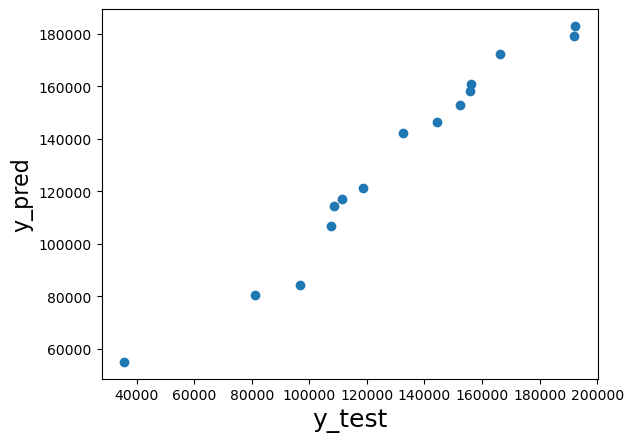

In [12]:
plt.scatter(y_test,y_predict)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)

In [14]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_predict)
meanSqErr = metrics.mean_squared_error(y_test, y_predict)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_predict))
print('R squared: {:.2f}'.format(mlr.score(X,Y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 95.68
Mean Absolute Error: 6346.21247153843
Mean Square Error: 67659199.15980043
Root Mean Square Error: 8225.521209005568


In [15]:
print(mlr.score(x_test, y_test))

0.9592483690540153
